# 1.Data Set Description

The Haberman’s survival data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## 2.Objective:

The survival of patients who had undergone surgery for breast cancer. predict whether the patient will survive after 5 years or not based upon the patient’s age, year of treatment and the number of positive lymph nodes.

## 3.Attribute Information:

1.Age of Patient at the time of operation

2.Patient's year of operation

3.Number of Positive axillary nodes detected

  Positive axilary nodes: A positive axillary lymph node is a lymph node in the area of the armpit (axilla) 
  to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining 
  them under a microscope to see whether cancer cells are present. 
    
4.Survival Status(class label) 1= the patient survived 5 years or longer 
                               2 = the patient died within 5 years

In [11]:
#Start 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Load Haberman data set
cancer_df=pd.read_csv('haberman.csv')

print(cancer_df.shape)
print(cancer_df.columns)
print(cancer_df.info())

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [3]:
# High Level Statistics
print(cancer_df.describe())
print("**************")
print(cancer_df.median())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000
**************
age       52.0
year      63.0
nodes      1.0
status     1.0
dtype: float64


In [13]:
print("Target variable")
print(cancer_df['status'].value_counts())
print("**************")
print(cancer_df['status'].value_counts(normalize=True))

Target variable
1    225
2     81
Name: status, dtype: int64
**************
1    0.735294
2    0.264706
Name: status, dtype: float64


## Observation(s):

1.The age of the patients vary from 30 to 80 with mean of 52

2.The Maximum number of positive lymph nodes observed is 52, nearly 74% of the patients have less than 5
  positive lymph nodes and 26% of the patients have no positive nymph nodes

3.The data set contains only a small number of records (306).

4.The Target column(class label) is imbalanced with 73% of values are 1




## 2-D Scatter Plot

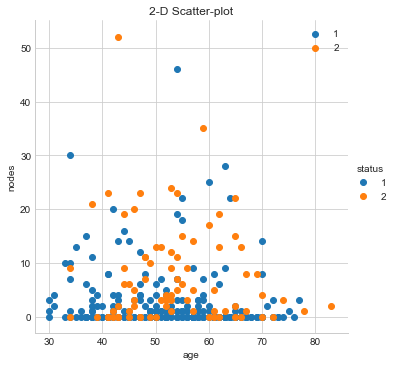

In [21]:
sns.set_style("whitegrid")
sns.FacetGrid(cancer_df,hue="status",size=5)\
    .map(plt.scatter,"age","nodes")\
    .add_legend()
plt.title("2-D Scatter-plot")
plt.legend()
plt.show()

## Observation(s):

1.Predict the survival of patients using 2-D Scatter plots is much harder as they have considarable overlap.

## Pair-plot

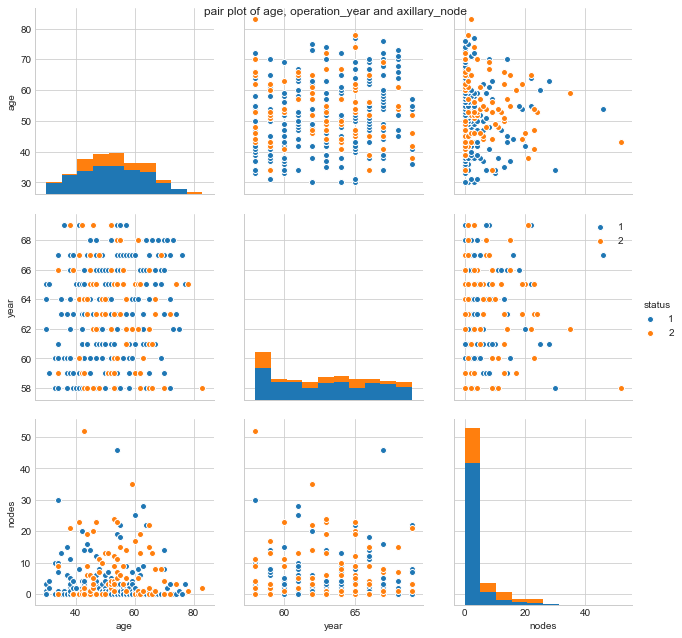

In [92]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.pairplot(cancer_df, hue = "status", vars = ["age", "year", "nodes"], size = 3)
plt.suptitle("pair plot of age, operation_year and axillary_node")
plt.legend()
plt.show()

## Observatons:

1.The Patient's year of operation doesn't seem to have an effect on the classification.

2.The Patient's Age and the number of axillary nodes seems to add some little/minor useful characteristics to the classification.

3.However, Bivariate analysis of the Haberman's data set is not much help.

4.Predict the survival of patients using pair plots is much harder as they have considarable overlap

## 4.Univariate Analysis

   ##      4.1 Histogram, PDF, CDF

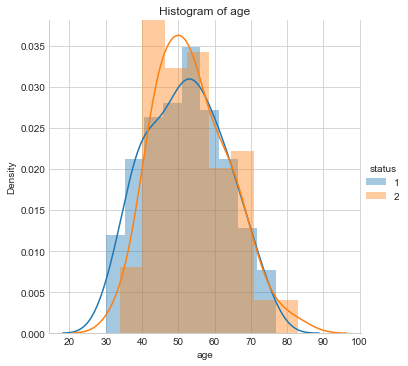

In [27]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(cancer_df,hue="status",size=5)\
    .map(sns.distplot,'age')\
    .add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

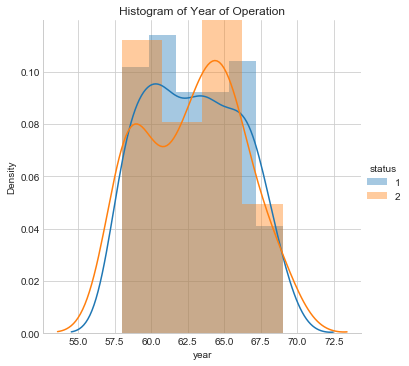

In [29]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(cancer_df,hue="status",size=5)\
    .map(sns.distplot,'year')\
    .add_legend()
plt.title("Histogram of Year of Operation")
plt.ylabel("Density")
plt.show()

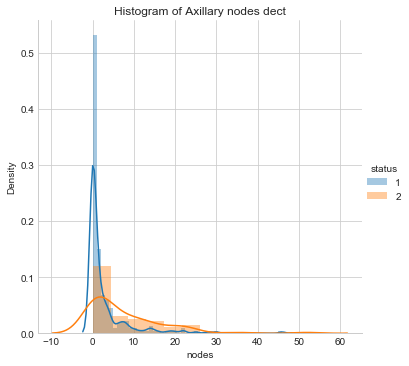

In [28]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(cancer_df,hue="status",size=5)\
    .map(sns.distplot,'nodes')\
    .add_legend()
plt.title("Histogram of Axillary nodes dect")
plt.ylabel("Density")
plt.show()

## Observation(s):

1.From the above there figure axillary nodes dect is clear for us, so we can say that probability distribution function(PDF) of 1 is high when compared to 2

2.The number of positive lymph nodes of the survivors is highly dense from 0 to 5

3.If 'Axillary nodes dect' <= 3 then the person is survived else demised.



## 4.2 CDF

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


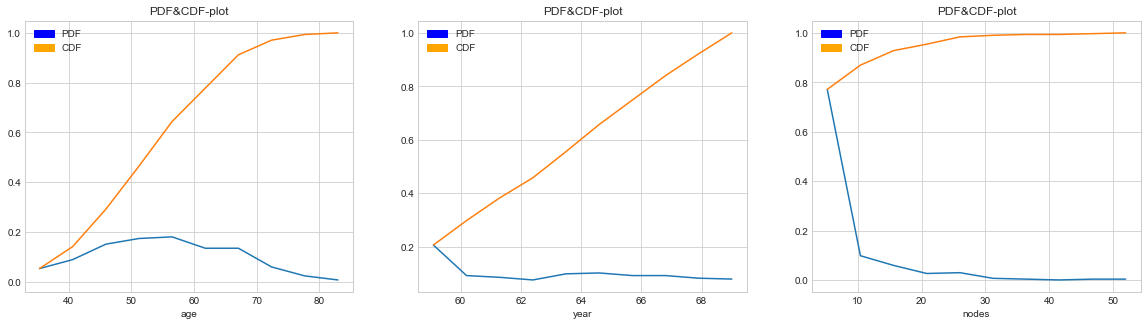

In [123]:
import matplotlib.patches as mpatches
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(cancer_df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)
    plt.title("PDF&CDF-plot")
    red_patch = mpatches.Patch(color='blue', label='PDF')
    blue_patch = mpatches.Patch(color='orange', label='CDF')
    plt.legend(handles=[red_patch, blue_patch])
    




## Observation(s):


1.About ~13% of the patients are below the age of 40 and we are having maximum patients between the age of 45-60. The PDF of the Patient Age graph shows that there are very less or zero(approaching) number of patients above the age of 80.

2.About ~30% of the operations happened between 1958 and 1960. We can also see that there was a sudden drop in the patients between the years 1961 to 1962.

3.Almost 80% of the patients have less than or equal to 5 positive lymph nodes.

## 4.3 Box-plot

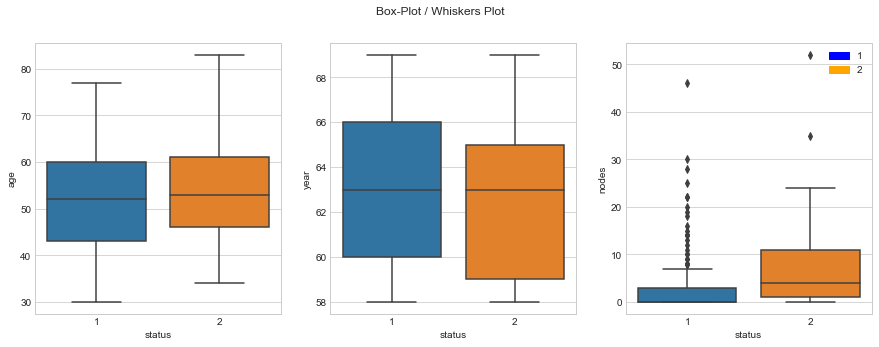

In [125]:
import matplotlib.patches as mpatches
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    sns.boxplot( x='status', y=feature, data=cancer_df, ax=axes[idx])
    
plt.suptitle('Box-Plot / Whiskers Plot')
#Adding legend to the Box-plot
red_patch = mpatches.Patch(color='blue', label=1)
blue_patch = mpatches.Patch(color='orange', label='2')
plt.legend(handles=[red_patch, blue_patch])

plt.show()


## Observation(s):

1.The Patient's who are having age between 30 to 34 have survived. Also, the patients who are having age more than 77 have unfortunately died. However, the mean of both the survival status according to the patient's age is the same.

2.It is quite evident from the whisker's plot between survival status and patient's year of operation that patient who was undergoing an operation before 1960 and after 1965 had higher chances of survival. However, we cannot confirm the reason why! Confidently trying to infer from such graph is quite difficult.

3.The patients who are having less than 3 positive axillary nodes had higher chances for survival. Also, the patients who are having more than 10 positive Axillary nodes had very fewer chances of survival.

4.Thus, just by the overall conclusion, we can infer that the year of operation does not add any luck towards the classification.

## 4.4 Violin-plots

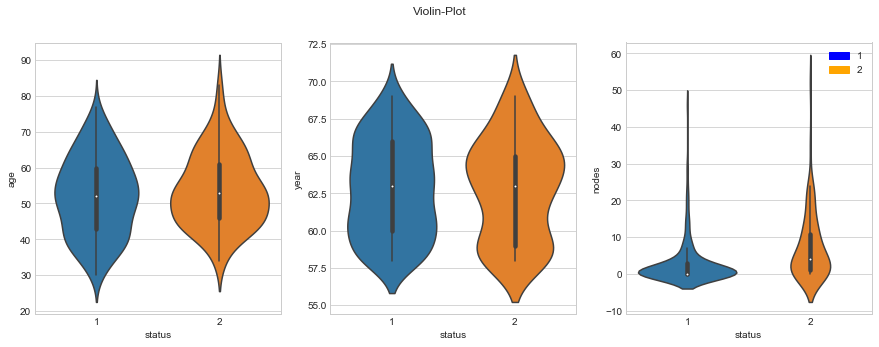

In [115]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.patches as mpatches
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=cancer_df, ax=axes[idx])\
    
    
plt.suptitle('Violin-Plot')

#Adding legend to the violin-plot
red_patch = mpatches.Patch(color='blue', label=1)
blue_patch = mpatches.Patch(color='orange', label='2')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

## Observation(s):

1.The Violin plot between the axillary nodes and the survival status shows that the probability of the patients        surviving after the operations is high when the number of positive axillary nodes are less than ~5.

## 2D Density plot, contors-plot

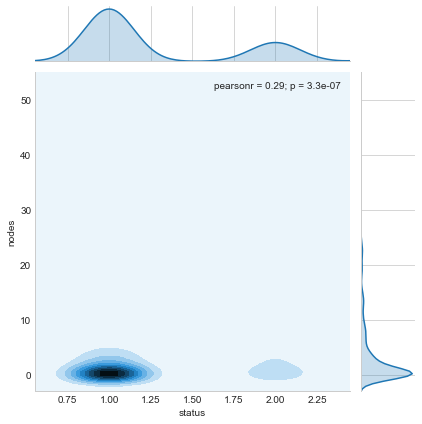

In [103]:
sns.jointplot(x="status", y="nodes", data=cancer_df, kind="kde");
plt.show();

## Observation(s):

1.Predict the survival of patients using 2-D Scatter plots is much harder as they have considarable overlap.

## Conclusion(s):

1.From this Dataset we can say that the majority of operations are performed on people age range 
  between 38 and 68, where most of the points plotted on scatter plot (year vs Age) 
    
2.We can see that there is quite good concentration of data point When node is 0.

3.Here with this scatter plot we get insight that patients with 0 nodes are more likely to survive 
  irrespective to there age. (node vs Age) 
  
4.Patients who are older than 50 and have nodes greater than 10 are more likely to dead.

5.Patients having who have 0 nodes are more likely to survive 

6.Box plot shows that, the more number of nodes, the more patients likely to die 

7.nodes is most important feature in this dataset, as who had node >= 1 those are more likely to die.

8.Age is also somewhat important feature of this dataset, because we have seen that patients who 
  aged less than 40 are likely to survive inspite of having node >= 1

## References:
   

1://en.wikipedia.org/wiki/Positive_axillary_lymph_node

2:https://www.kaggle.com/gilsousa/habermans-survival-data-set

 